#K means clustering using iris dataset

---



1.   Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2.   Figure out if any preprocessing such as scaling would help here
3.   Draw elbow plot and from that figure out optimal value of k



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('/content/Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.drop([	'Id',	'SepalLengthCm',	'SepalWidthCm'],axis='columns',inplace=True)
df.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


Text(0, 0.5, 'PetalWidthCm')

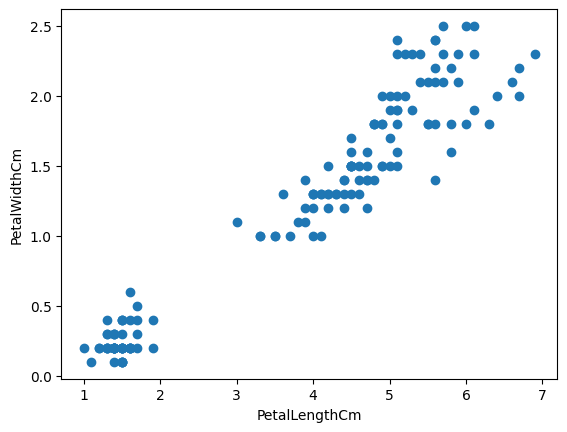

In [12]:
plt.scatter(df.PetalLengthCm,df.PetalWidthCm)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

In [14]:
km = KMeans(n_clusters=3,n_init=10)
y_predicted = km.fit_predict(df[['PetalLengthCm'	,'PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [15]:
df['cluster']=y_predicted
df.head()

,PetalLengthCm,PetalWidthCm,Species,cluster
0,1.4,0.2,Iris-setosa,1
1,1.4,0.2,Iris-setosa,1
2,1.3,0.2,Iris-setosa,1
3,1.5,0.2,Iris-setosa,1
4,1.4,0.2,Iris-setosa,1


In [16]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

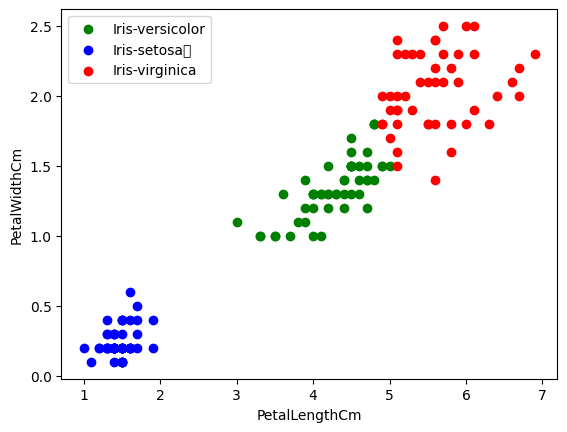

In [18]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='green',label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='blue',label='Iris-setosa	')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='red',label='Iris-virginica')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

**Showing centroids**

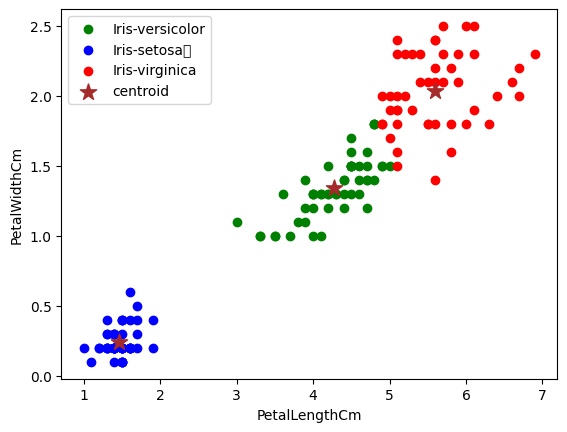

In [26]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='green',label='Iris-versicolor')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='blue',label='Iris-setosa	')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='brown',marker='*',label='centroid',s=150)

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

**Now doing scaling by using MinMaxScaling preprocessing**

In [27]:
scaler = MinMaxScaler()

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm']=scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm']=scaler.transform(df[['PetalWidthCm']])

In [28]:
df.head()

,PetalLengthCm,PetalWidthCm,Species,cluster
0,0.067797,0.041667,Iris-setosa,1
1,0.067797,0.041667,Iris-setosa,1
2,0.050847,0.041667,Iris-setosa,1
3,0.084746,0.041667,Iris-setosa,1
4,0.067797,0.041667,Iris-setosa,1


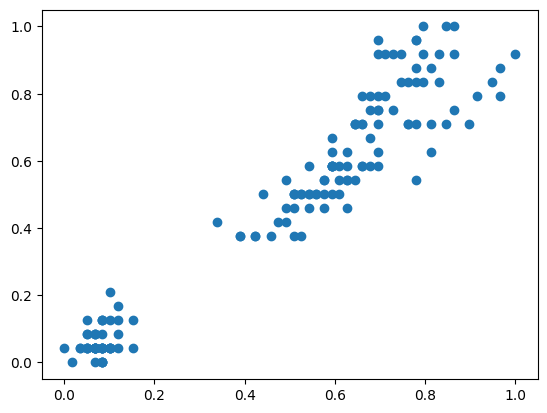

In [31]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])

In [33]:
km = KMeans(n_clusters=3,n_init=10)
y_predicted = km.fit_predict(df[['PetalLengthCm'	,'PetalWidthCm']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [34]:
df['cluster']=y_predicted
df.head()

,PetalLengthCm,PetalWidthCm,Species,cluster
0,0.067797,0.041667,Iris-setosa,0
1,0.067797,0.041667,Iris-setosa,0
2,0.050847,0.041667,Iris-setosa,0
3,0.084746,0.041667,Iris-setosa,0
4,0.067797,0.041667,Iris-setosa,0


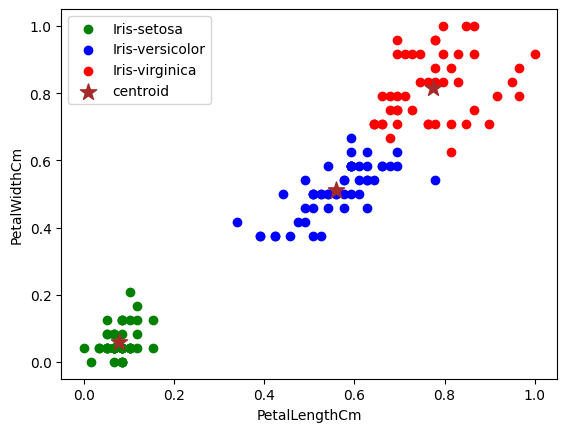

In [35]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='green',label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='blue',label='Iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='red',label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='brown',marker='*',label='centroid',s=150)

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

**Here for Figuring out if any preprocessing such as scaling would help here or not!!? so the answer is 'NO' here, because above we can see that whether we are doing it with MinMaxScaling or not ,we are getting the same output in both cases that means there is not much difference in x and y axis scaling , they are already right scaled**

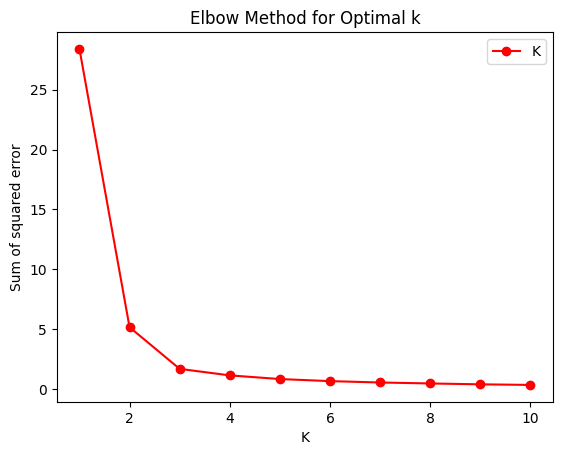

In [41]:
sse = []  #sse:sum of square errors
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k,n_init=10)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)  # .inertia_ gives sse
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method for Optimal k')
plt.plot(k_range,sse,marker='o',color='red',label='K')
plt.legend()